# Global Sea Surface Temperature (SST) data

In this tutorial, we will look at how to access and analyse **global sea surface temperature (SST)** data.

**Included:**
- Presentation and description of different sea surface temperature datasets, including their differences and the scenarios in which each is used.
- A demonstration of how to access and analyse the data using Python.
    - [Level-3 data](#level-3-data-osi-201-b)
    - [Level-4 data](#level-4-data-noaa-14-daily-optimum-interpolation-sea-surface-temperature-oisst)

## **What Do We Mean by Sea Surface Temperature?**  

At first glance, defining **sea surface temperature (SST)** might seem straightforward, but the ocean’s temperature can vary significantly within its uppermost layers due to factors like weather conditions and ocean currents. Therefore, it is essential to specify **the depth range being measured**. This depends on the instrument used and the wavelength band measured.  

- **Infrared radiometers** measure the **skin temperature** of the ocean, usually sensing the uppermost **10 µm (micrometres)** of the surface.  
- **Microwave radiometers** measure the **subskin temperature**, penetrating deeper; approximately **1 mm** below the surface.  

Consequently, SST measurements from different instruments may not always align.

![SST depth profile](images/newerSSTdef.png)

*Figure from [Group for High Resolution Sea Surface Temperature (GHRSST)](https://www.ghrsst.org/ghrsst-data-services/for-sst-data-users/products/)*


## **Measuring Sea Surface Temperature from Space**  

Satellites measure SST through **passive remote sensing**, meaning they do not emit signals but instead detect naturally occurring radiation emitted or reflected. However, SST is **not measured directly**; rather, it is inferred through a series of **calibration and correction steps** applied to the raw data collected by the satellite’s radiometer.  

SST is typically measured using **infrared radiometers** or **microwave radiometers**, each with its own advantages and limitations.  

### **Infrared Radiometers**  

Infrared radiometers measure **thermal infrared radiation** emitted by the ocean’s surface, providing high-resolution SST estimates under clear-sky conditions. 

**Examples**  
- **Advanced Very High Resolution Radiometer (AVHRR)**:  https://www.class.noaa.gov/data_available/avhrr/index.htm 
- **Sentinel-3 Sea and Land Surface Temperature Radiometer (SLSTR):** https://sentiwiki.copernicus.eu/web/s3-slstr-instrument  

**Advantages**  
✔ **High spatial resolution**, enabling detailed SST maps.  
✔ **Accurate SST retrievals** under cloud-free conditions.  

**Limitations**  
✘ Cannot measure SST through clouds, as water vapor absorbs infrared radiation.  
✘ More affected by **atmospheric interference**, requiring more correction algorithms.  

### **Microwave Radiometers**  

Microwave radiometers measure **naturally emitted microwave radiation** from the ocean surface, providing SST estimates even in cloudy conditions. Microwave emissions penetrate atmospheric water vapor more effectively than infrared radiation.  

**Examples**  
- **GCOM-W Advanced Microwave Scanning Radiometer 2 (AMSR2):** https://www.earthdata.nasa.gov/data/instruments/amsr2  
- **SMOS Microwave Imaging Radiometer using Aperture Synthesis (MIRAS):** https://earth.esa.int/eogateway/instruments/miras
- **TROPICS** (NASA)   

**Advantages**  
✔ Can measure SST **through clouds**, making it ideal for all-weather monitoring.  
✔ Less sensitive to **atmospheric interference** than infrared methods.  

**Limitations**  
✘ **Lower spatial resolution**, meaning SST estimates are less detailed.  
✘ More affected by **surface roughness** (e.g., wind-driven waves).  

## Data Processing Levels

SST products exist at different processing levels, from raw instrument readings to fully interpolated datasets. In this tutorial we will show you how to acces data from **Level-3** and **Level-4** data that are useful for most potential data users.

### Level-2: Native Resolution SST Products

Satellite radiometers collect raw digital data (Level-0) that is subsequently calibrated and converted into brightness temperatures (Level-1). These brightness temperatures are then processed—with atmospheric corrections applied—to derive Sea Surface Temperature (SST) products on the satellite’s native grid (Level-2). Data are served in one file per satellite image. May require additional processing or interpolation before integration into larger-scale studies.

**When to use:**
- When you need high-resolution data with exact observation times.
- For studying local or short-term events.
- If you plan to apply your own processing or interpolation.

![Sentinel-3 Level-2 products](images/S3_L2_SST_products.png)

*Map showing outlines of Sentinel-3 Level-2 products.*

### Level-3: Gridded SST Products
The data are mapped onto a regular spatial grid at various resolutions (e.g., daily or twice daily). The data are served in global or regional products. Although some of the native resolution detail is lost during the gridding process, Level-3 data strike a balance between spatial detail and ease of use.

**When to use:** 
- For relatively high-resolution regional or global studies.
- When you need data on a standard grid for easier integration and analysis.

![Level-3 data: OSI-201-b](images/sst_level3.png)
*Level-3 data: Ocean and Sea Ice Satellite Application Facility (OSI-SAF) OSI-201-b*

### Level-4: Gap-Filled and Model-Interpolated SST
Finally, Level-4 SST products incorporate provide gap-free data, sometimes combining Level-3 satellite observations with in-situ measurements (e.g., from buoys and ships) and model-generated data. The fusion of multiple data sources mitigates issues such as cloud cover or sensor anomalies, ensuring consistent temporal and spatial coverage. However, users should note that the merging and interpolation processes may introduce some smoothing, which means that while Level-4 products are excellent for detecting long-term trends and patterns, they might not capture the finest-scale details present in the original satellite observations.

**When to use:**
- When you require a continuous, gap-free dataset.
- For long-term climate monitoring and trend analysis.
- If you prefer a ready-to-use dataset even if it means some loss of the finer detail. 

![Level-4 data: NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature](images/sea_water_temperatures.png)
*Level-4 data: National Ocean and Atmospheric Administration (NOAA) 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST)*

### Visual Comparison of Level-3 and Level-4 Data

![Level-3 vs Level-4 data](images/SST_L3_vs_L4.png)
*A comparison of level-3 (left) vs level-4 (right) data. Data from 2024-06-01.*

## Preparing our Python session

Before we begin accessing the data, let's first import the modules that we will use today

In [36]:
import xarray as xr
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from datetime import datetime
import cartopy.feature as cfeature
import plotly.graph_objects as go
import numpy as np

## Level-3 data: OSI-201-b

![Level-3 data: OSI-201-b](images/sst_level3.png)

The **OSI-201-b** product, known as the **Global Metop Sea Surface Temperature (SST)**, is a Level 3C dataset produced by the Ocean and Sea Ice Satellite Application Facility (OSI SAF). It provides twice-daily global SST measurements derived from the Advanced Very High Resolution Radiometer (AVHRR) aboard the Metop-B satellite. These measurements are processed using a multispectral algorithm that utilises infrared channels at 3.7, 10.8, and 12.0 µm, along with a cloud mask to ensure data quality. Additional inputs from the European Centre for Medium-Range Weather Forecasts (ECMWF), including atmospheric temperature, humidity, and aerosol profiles, are incorporated to correct for regional and seasonal biases. The data is presented on a 0.05° regular grid in NetCDF4 format, compliant with the Group for High Resolution Sea Surface Temperature (GHRSST) Data Specification version 2. Regular validation is performed by comparing satellite estimates against buoy measurements, achieving a target accuracy with a monthly absolute mean difference of 0.5 K and a standard deviation of 0.8 K. This product is essential for operational meteorological services, oceanographic analyses, and environmental monitoring.

### Data characteristics
- **Spatial resolution**: 0.05° latitude × 0.05° longitude.  
- **Temporal coverage**: 2 products per day (00:00, 12:00) since 2016
- **Includes**: Sea surface temperatures, sea ice concentration, wind speed.
  
### Useful Links

- **Dataset Information Page**  
  https://osi-saf.eumetsat.int/products/osi-201-b
  
- **THREDDS Catalogue**
  - Human interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.html
  - Machine interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.xml


### Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> OSI SAF Global Sea Surface Temperature (Metop-B/AVHRR) 2016-onwards, OSI-201-b, doi:10.15770/EUM_SAF_OSI_NRT_2011. EUMETSAT Ocean and Sea Ice Satellite Application Facility. Data extracted from [distributor/distribution mean]: ([extracted period],) ([extracted domains],) accessed [download date]

The content within square brackets "[…]" is to be replaced with whatever distributor, period, domain or download date is relevant to the data being used. The "extracted period" and "extracted domains" are only needed if a subset of the data is being used.
Suggestions for "distributor/distribution mean": OSI SAF FTP server/the EUMETSAT Data Centre/EUMETCast/name and URL of a redistributor...

### Opening and understanding the data

The data have been published in a series of CF-NetCDF files, two per day - one for midnight and one for midday. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDS catalogue:

- Human interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.html
- Machine interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.xml

If you click on the human-interface above, you can navigate through the folders. The data are organised by year and then day of year. There are two files per day.

```
data
├── 2024
│ ├── 001
│ ├── 002
│ ├── 003
│ └── ...
├── 2025
│ ├── 001
│ ├── 002
│ └── ...
```

You will see that the data are served over OPeNDAP. OPeNDAP provides a way of streaming data over the internet so you don't have to download them to your own computer. You can copy the OPeNDAP Data URL and use it in your script in the same way that you would use a local filepath.

Let's start by loading in the data from a single file.

In [2]:
url = 'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/2025/040/20250209000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_20250209_000000-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 3GB
Dimensions:                    (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2025-02-09
  * lat                        (lat) float32 14kB -89.97 -89.92 ... 89.92 89.97
  * lon                        (lon) float32 29kB -180.0 -179.9 ... 179.9 180.0
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float64 207MB ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] 207MB ...
    sses_bias                  (time, lat, lon) float64 207MB ...
    sses_standard_deviation    (time, lat, lon) float64 207MB ...
    dt_analysis                (time, lat, lon) float64 207MB ...
    wind_speed                 (time, lat, lon) float64 207MB ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float64 207MB ...
    sources_of_adi             (time, lat, lon) float32 104MB ...
    l2p_flags                  (time, lat, lon) int16 52MB ...
    quality_level              (time, lat, lon) float32 104MB ...
    satellite_zenith_angle     (time, lat, lon) float64 207MB ...
    solar_zenith_angle         (time, lat, lon) float64 207MB ...
Attributes: (12/47)
    Conventions:                CF-1.4
    title:                      Sea Surface Temperature
    summary:                    The GLB L3C product derived from METOP B AVHR...
    references:                 Low Earth Orbiter Sea Surface Temperature Pro...
    institution:                OSISAF
    history:                    METEO-FRANCE/CMS LEOSAFO processor
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3C
    cdm_data_type:              grid

The OPeNDAP data access URL is predictable, a function of the date. Let's write something to access the data from any date of our choosing.

In [3]:
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

print(f"Date: {desired_date}")
print(f"Year: {year}")
print(f"Day of Year: {day_of_year}")

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

xrds

Date: 20240201
Year: 2024
Day of Year: 032


<xarray.Dataset> Size: 3GB
Dimensions:                    (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2024-02-01T12:00:00
  * lat                        (lat) float32 14kB -89.97 -89.92 ... 89.92 89.97
  * lon                        (lon) float32 29kB -180.0 -179.9 ... 179.9 180.0
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float64 207MB ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] 207MB ...
    sses_bias                  (time, lat, lon) float64 207MB ...
    sses_standard_deviation    (time, lat, lon) float64 207MB ...
    dt_analysis                (time, lat, lon) float64 207MB ...
    wind_speed                 (time, lat, lon) float64 207MB ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float64 207MB ...
    sources_of_adi             (time, lat, lon) float32 104MB ...
    l2p_flags                  (time, lat, lon) int16 52MB ...
    quality_level              (time, lat, lon) float32 104MB ...
    satellite_zenith_angle     (time, lat, lon) float64 207MB ...
    solar_zenith_angle         (time, lat, lon) float64 207MB ...
Attributes: (12/47)
    Conventions:                CF-1.4
    title:                      Sea Surface Temperature
    summary:                    The GLB L3C product derived from METOP B AVHR...
    references:                 Low Earth Orbiter Sea Surface Temperature Pro...
    institution:                OSISAF
    history:                    METEO-FRANCE/CMS LEOSAFO processor
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3C
    cdm_data_type:              grid

The data have 3 dimensions, `time`, `lat` and `lon`. However, since there is only one timeslice in each file, we can consider the data to be essentially 2D. Each variable has metadata associated it, and the dataset as a whole has 47 *global* attributes.

Let's have a look at the variable attributes for the `sea_surface_temperature` variable for example.

In [4]:
xrds['sea_surface_temperature'].attrs

{'long_name': 'sea surface subskin temperature',
 'standard_name': 'sea_surface_subskin_temperature',
 'units': 'kelvin',
 'valid_min': -300,
 'valid_max': 4500,
 'depth': '1 millimeter',
 'source': 'AVHRR_METOP_B',
 'comment': 'Temperature of the subskin of the ocean',
 '_ChunkSizes': array([   1, 1200, 2400], dtype=int32)}

The `standard_name` provides a standardised, machine-readable name for the variable. You can read a description for this variable in the Climate & Forecast (CF) standard name table found at:

https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

The data provider should have carefully read the description upon selecting the standard name, and the data user can also read the description, so the data user and provider share some common understanding about what the data are.

### Writing the data to a CSV file

You can write all or a subset of the data to a pandas dataframe that you can export as a CSV file.

In [5]:
df = xrds['sea_surface_temperature'].to_dataframe()
df.head()

sea_surface_temperature
time                lat        lon                                 
2024-02-01 12:00:00 -89.974609 -179.974609                      NaN
                               -179.924805                      NaN
                               -179.875000                      NaN
                               -179.825195                      NaN
                               -179.775391                      NaN

Or for a list of variables

In [6]:
df = xrds[['sea_surface_temperature', 'wind_speed', 'sea_ice_fraction']].to_dataframe()
df.head()

sea_surface_temperature  \
time                lat        lon                                    
2024-02-01 12:00:00 -89.974609 -179.974609                      NaN   
                               -179.924805                      NaN   
                               -179.875000                      NaN   
                               -179.825195                      NaN   
                               -179.775391                      NaN   

                                            wind_speed  sea_ice_fraction  
time                lat        lon                                        
2024-02-01 12:00:00 -89.974609 -179.974609         NaN               NaN  
                               -179.924805         NaN               NaN  
                               -179.875000         NaN               NaN  
                               -179.825195         NaN               NaN  
                               -179.775391         NaN               NaN

To write the dataframe to a CSV file:

In [7]:
df.to_csv('global_sea_surface_temperatures.csv')

### Converting from Kelvin to Celsius

The `sea_surface_temperature` values are stored in degrees kelvin.

In [8]:
xrds['sea_surface_temperature'].attrs['units']

'kelvin'

We can convert the data to celsius.

In [9]:
sst_celsius = xrds['sea_surface_temperature'] - 273.15

### Plotting the data for a day of our choosing

Let's use the code we used above to first isolate the data for a single day, then let's build on that to quickly plot the data.

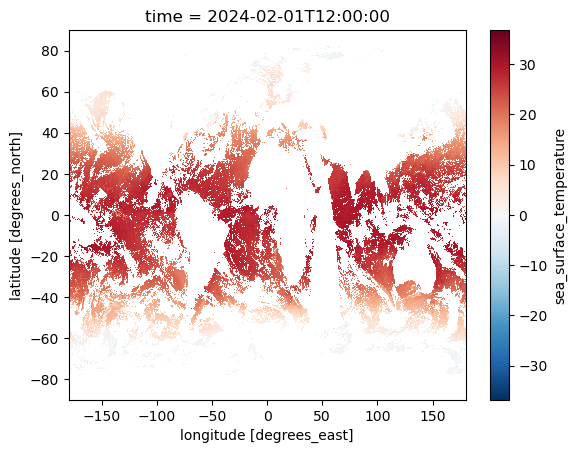

In [10]:
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

sst_celsius = xrds['sea_surface_temperature'] - 273.15

sst_celsius.plot()
plt.show()

Without the coastlines these data are difficult to interpret. Let's add them, as well as different colours for the land and sea.

We should also choose a map projection.

- Map projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
- Matplotlib built-in colourmaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
- Colourmaps for oceanography from `cmocean`: https://matplotlib.org/cmocean/

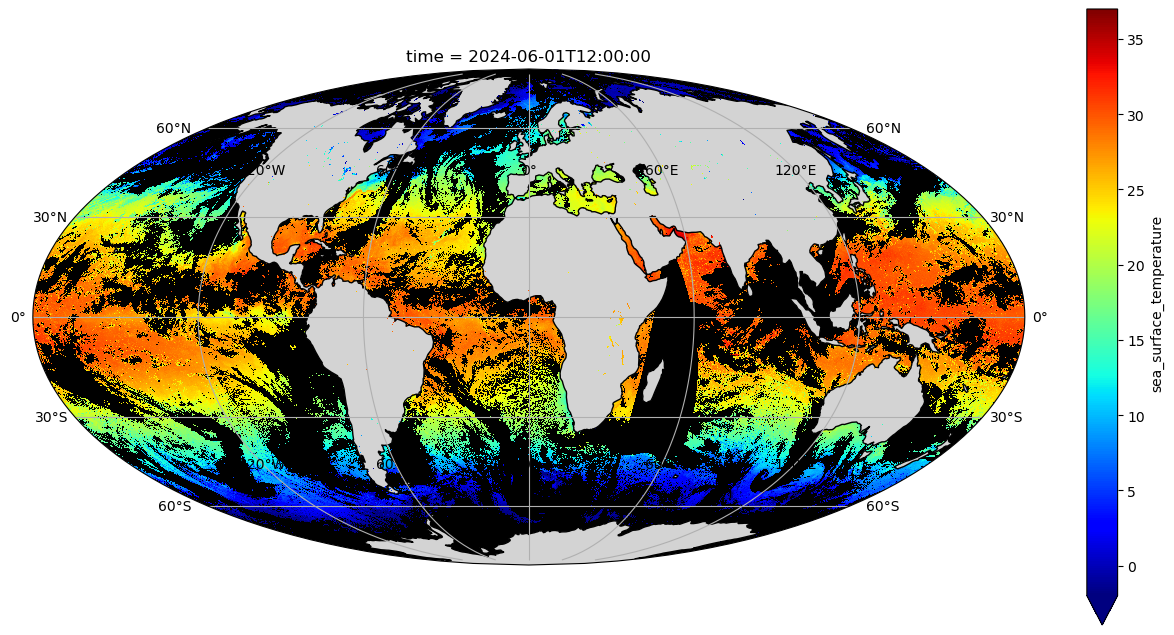

In [11]:
# Loading in the data
desired_date = '20240601'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

# Setting up the figure
projection = ccrs.Mollweide()
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey')
ax.gridlines(draw_labels=True)
ax.coastlines()

# Plotting the data
sst_celsius = xrds['sea_surface_temperature'] - 273.15
vmin = -2
vmax = sst_celsius.max()
sst_celsius.plot(ax=ax, transform=transform, cmap='jet', vmin=vmin, vmax=vmax)
plt.savefig('sst_level3.png', transparent=True)
plt.show()

### Plotting sea ice

The dataset also includes sea ice concentration data.

In [12]:
xrds['sea_ice_fraction']

<xarray.DataArray 'sea_ice_fraction' (time: 1, lat: 3600, lon: 7200)> Size: 207MB
[25920000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-06-01T12:00:00
  * lat      (lat) float32 14kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon      (lon) float32 29kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      sea ice fraction
    standard_name:  sea_ice_area_fraction
    units:           
    valid_min:      0
    valid_max:      100
    time_offset:    0.0
    source:         ICE-OSISAF
    comment:        Fractional sea ice cover from OSISAF ice product
    _ChunkSizes:    [   1 1800 3600]

Let's mask the sea surface temperature data anywhere that the sea ice concentration is greater than 0.

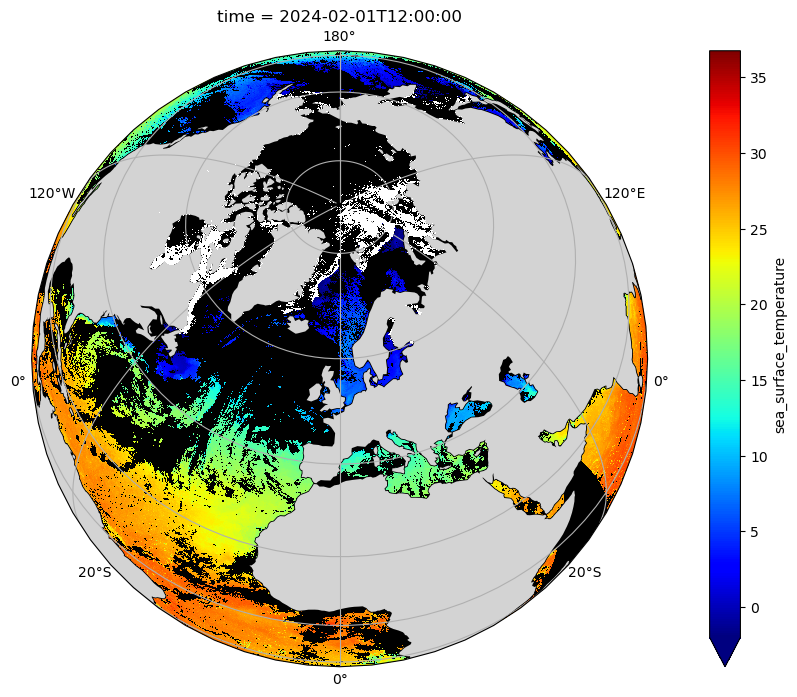

In [13]:
# Loading in the data
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

# Setting up the figure
projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=60.0)
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgrey')
ax.gridlines(draw_labels=True)
ax.coastlines()

sst_celsius = xrds['sea_surface_temperature'] - 273.15
vmin = -2
vmax = sst_celsius.max()
sst_celsius.plot(ax=ax, transform=transform, cmap='jet', vmin=vmin, vmax=vmax, zorder=1)

ice_mask = xrds['sea_ice_fraction'].where(xrds['sea_ice_fraction'] > 0)
# Values range from 0 to 100, so setting the range for the colormap to 100 to 101 will plot everything white
ice_mask.plot(ax=ax, transform=transform, vmin=100, vmax=101, cmap='Greys', add_colorbar=False, zorder=3)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')

plt.savefig(f'sea_water_temperatures.png', transparent=True)
plt.show()

### Zooming in on area of interest

Let's now provide a latitude and longitude range to zoom in on.

If you have an xarray object, for example:

In [14]:
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

Let's first take a subset of that for our desired range

In [15]:
lat_range = slice(-60, 74)
lon_range = slice(-90, 60)
ds_aoi = xrds.sel(lat=lat_range, lon=lon_range)
ds_aoi

<xarray.Dataset> Size: 788MB
Dimensions:                    (time: 1, lat: 2680, lon: 3000)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2024-02-01T12:00:00
  * lat                        (lat) float32 11kB -59.97 -59.92 ... 73.92 73.97
  * lon                        (lon) float32 12kB -89.97 -89.92 ... 59.92 59.97
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float64 64MB ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] 64MB ...
    sses_bias                  (time, lat, lon) float64 64MB ...
    sses_standard_deviation    (time, lat, lon) float64 64MB ...
    dt_analysis                (time, lat, lon) float64 64MB ...
    wind_speed                 (time, lat, lon) float64 64MB ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float64 64MB ...
    sources_of_adi             (time, lat, lon) float32 32MB ...
    l2p_flags                  (time, lat, lon) int16 16MB ...
    quality_level              (time, lat, lon) float32 32MB ...
    satellite_zenith_angle     (time, lat, lon) float64 64MB ...
    solar_zenith_angle         (time, lat, lon) float64 64MB ...
Attributes: (12/47)
    Conventions:                CF-1.4
    title:                      Sea Surface Temperature
    summary:                    The GLB L3C product derived from METOP B AVHR...
    references:                 Low Earth Orbiter Sea Surface Temperature Pro...
    institution:                OSISAF
    history:                    METEO-FRANCE/CMS LEOSAFO processor
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3C
    cdm_data_type:              grid

We can then proceed to plotting the data as normal.

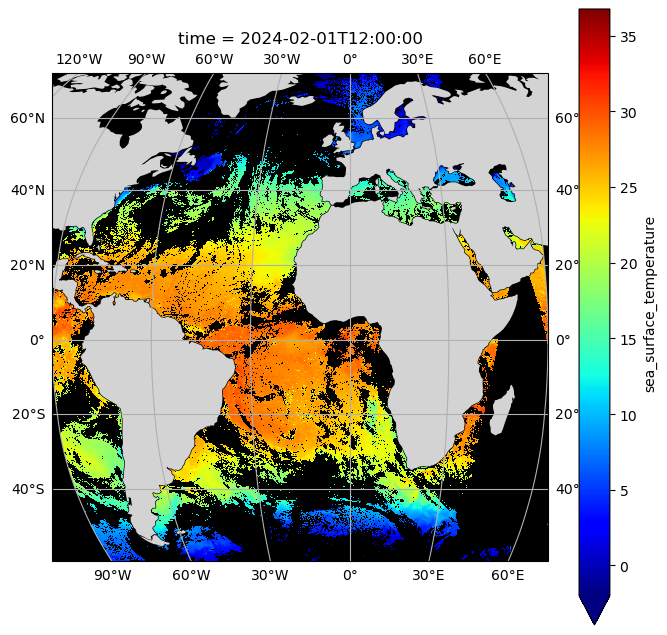

In [16]:
fig = plt.figure(figsize=(8, 8))
projection = ccrs.Robinson()
transform = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

vmin = -2
vmax = sst_celsius.max()
cmap='jet'

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgrey')
ax.gridlines(draw_labels=True)
ax.coastlines()

sst_celsius = ds_aoi['sea_surface_temperature'] - 273.15
sst_celsius.plot(
    ax=ax,
    transform=transform,
    vmin=vmin,
    vmax=vmax, 
    cmap=cmap,
    zorder=1
)

plt.show()

### Finding the sea surface temperature at a given location and date

Let's now look at how to find the value for the sea surface temperature at a given location and time. We will using the method `nearest` to find the nearest value to our selected point, though other methods are available.
https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html



In [17]:
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000
desired_latitude = 40
desired_longitude = -12

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

sst_value = xrds.sel(
    time = desired_date,
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)['sea_surface_temperature'].values

print(sst_value, xrds['sea_surface_temperature'].attrs['units'])


289.97999999999996 kelvin


We might also want to find out what latitude, longitude and time that value corresponds to.

In [18]:
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

single_point = xrds.sel(
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)

latitude_value = single_point['lat'].values
longitude_value = single_point['lon'].values
sst_value = single_point['sea_surface_temperature'].values

print('Latitude:',latitude_value)
print('Longitude:',longitude_value)
print('Sea surface temperature value:',sst_value, xrds['sea_surface_temperature'].attrs['units'])

Latitude: 40.02539
Longitude: -11.974609
Sea surface temperature value: [289.98] kelvin


## Level-4 data: NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST)

![Map of global sea surface temperatures](images/sea_water_temperatures.png)

The **NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST)** incorporates observations from different platforms (satellites, ships, buoys and Argo floats) into a regular global grid. The dataset is interpolated to fill gaps on the grid and create a spatially complete map of sea surface temperature. Satellite and ship observations are referenced to buoys to compensate for platform differences and sensor biases.

### Data characteristics
- **Spatial resolution**: 0.25° latitude × 0.25° longitude.  
- **Temporal coverage**: Daily values from September 1981 to the present.
- **Updated**: Daily  

> **Note:** Data less than 15 days old may be subject to revision by NCEI

### Useful Links

- **Dataset Information Page**  
  https://www.ncei.noaa.gov/products/optimum-interpolation-sst

- **Dataset Landing Page**  
https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00844#:~:text=The%20NOAA%201%2F4%20degree,gaps%20filled%20in%20by%20interpolation.
  
- **THREDDS Catalogue**
  - Human interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.html
  - Machine interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.xml


### Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> Richard W. Reynolds, Viva F. Banzon, and NOAA CDR Program (2008): NOAA Optimum Interpolation 1/4 Degree Daily Sea Surface Temperature (OISST) Analysis, Version 2. [indicate subset used]. NOAA National Centers for Environmental Information. doi:10.7289/V5SQ8XB5 [access date].

### Opening and understanding the data

The data have been published in a series of CF-NetCDF files, one per year, which are updated daily. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDS catalogue:

- Human interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.html
- Machine interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.xml

If you click on the human-interface above, you can navigate through the folders and select one of the files. You will see that the data are served over OPeNDAP. OPeNDAP provides a way of streaming data over the internet so you don't have to download them to your own computer. You can copy the OPeNDAP Data URL and use it in your script in the same way that you would use a local filepath.

Let's start by loading in the data from a single file.

In [19]:
url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2025.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 228MB
Dimensions:  (time: 55, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 440B 2025-01-01 2025-01-02 ... 2025-02-24
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 228MB ...
Attributes:
    Conventions:                     CF-1.5
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

The OPeNDAP data access URL is predictable, a function of the date. Let's write something to access the data from any date of our choosing.

In [20]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)
ds_one_day

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
    time     datetime64[ns] 8B 2024-02-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (lat, lon) float32 4MB ...
Attributes:
    Conventions:                     CF-1.5
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

The data have 3 dimensions, `time`, `lat` and `lon`. Upon selecting the sea surface temperature (`sst`) data for a single date, we have a 2 dimensional array. Each variable has metadata associated it, and the dataset as a whole has 66 *global* attributes.

Let's have a look at the variable attributes for the `sst` variable for example.

In [21]:
xrds['sst'].attrs

{'long_name': 'Daily Sea Surface Temperature',
 'units': 'degC',
 'valid_range': array([-3., 45.], dtype=float32),
 'precision': 2.0,
 'dataset': 'NOAA High-resolution Blended Analysis',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'parent_stat': 'Individual Observations',
 'actual_range': array([-1.8 , 36.13], dtype=float32),
 '_ChunkSizes': array([   1,  720, 1440], dtype=int32)}

One noteable attribute is missing. According to the Climate & Forecast (CF) conventions, variables should in most cases have a `standard_name` variable attribute. One could suggest that the data are not FAIR-compliant without this, since the `standard_name` provides a standardised, machine-readable name for the variable. Terms can be taken the CF standard name table found at:

https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

Standard names are accompanied by a description for the data. The data provider should have carefully read the description upon selecting the standard name, and the data user can also read the description, so the data user and provider share some common understanding about what the data are. 

If the data providers are reading this, please add this!

### Writing the data to a CSV file

You can write all or a subset of the data to a pandas dataframe that you can export as a CSV file.

In [22]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)
df = ds_one_day['sst'].to_dataframe()
df.head()

time  sst
lat     lon                  
-89.875 0.125 2024-02-01  NaN
        0.375 2024-02-01  NaN
        0.625 2024-02-01  NaN
        0.875 2024-02-01  NaN
        1.125 2024-02-01  NaN

In [23]:
df.to_csv('global_sea_surface_temperatures.csv')

### Plotting the data for a day of our choosing

Let's use the code we used above to first isolate the data for a single day, then let's build on that to quickly plot the data.

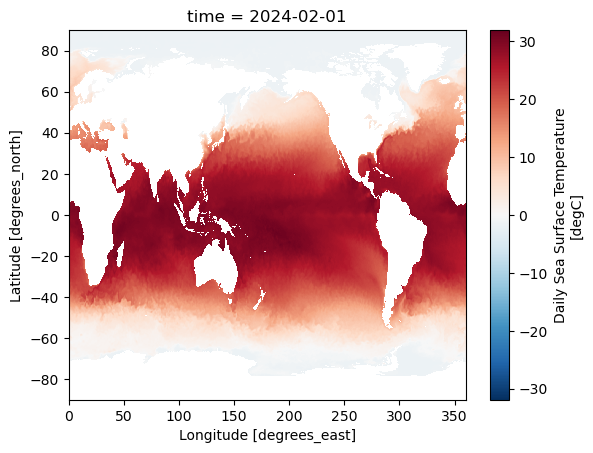

In [24]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)
ds_one_day['sst'].plot()
plt.show()

If you accidentally select a date that isn't present in the time series, you can use `method = 'nearest'` to select the data from the nearest timestamp to the date you provide. Other methods can also be used, you can read about this here: 

https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html#xarray-dataset-sel

In [25]:
ds_one_day = xrds.sel(time = desired_date , method='nearest')

Without the coastlines these data are difficult to interpret. Let's now explore how to improve this plot and perhaps use some different projections. 

#### Full working example

Below is a full working example you can copy and play with.

- Map projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
- Matplotlib built-in colourmaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
- Colourmaps for oceanography from `cmocean`: https://matplotlib.org/cmocean/

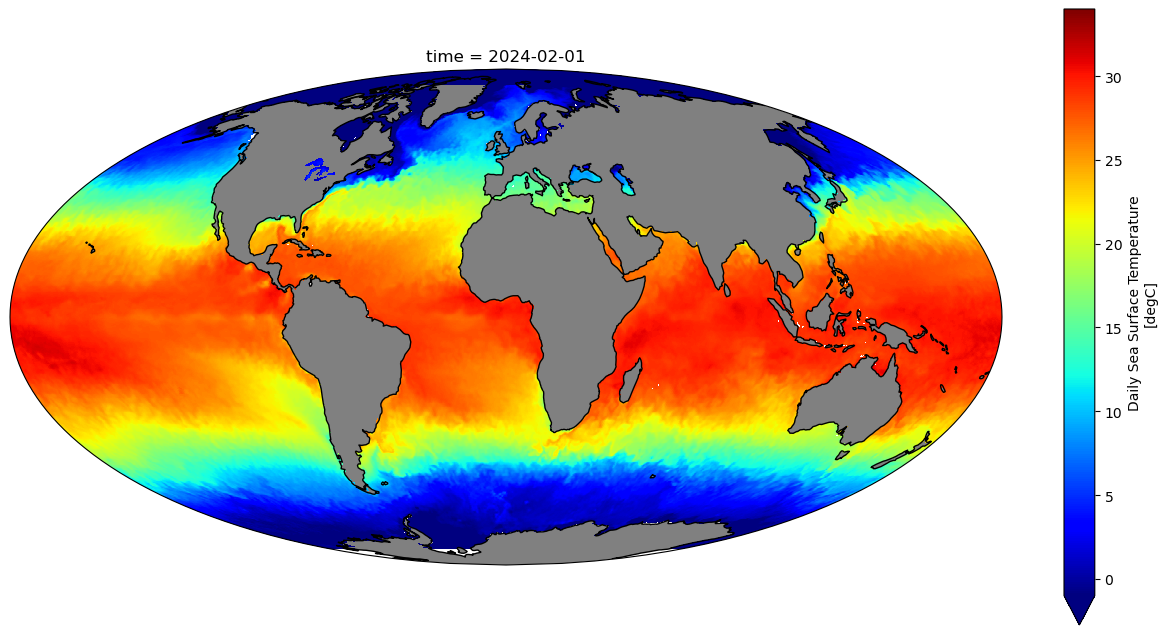

In [26]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

projection = ccrs.Mollweide()
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

xrds = xrds.sel(time = desired_date)
sst = xrds['sst'].where(xrds['sst'] > -3)

vmin = -1
vmax = 34

sst.plot(ax=ax, transform=transform, vmin=vmin, vmax=vmax, cmap='jet')

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')

plt.savefig(f'sea_water_temperatures.png', transparent=True)
plt.show()

### Adding a mask for sea ice

The dataset also includes sea ice concentration data. Let's mask the sea surface temperature data anywhere that the sea ice concentration is greater than 0.

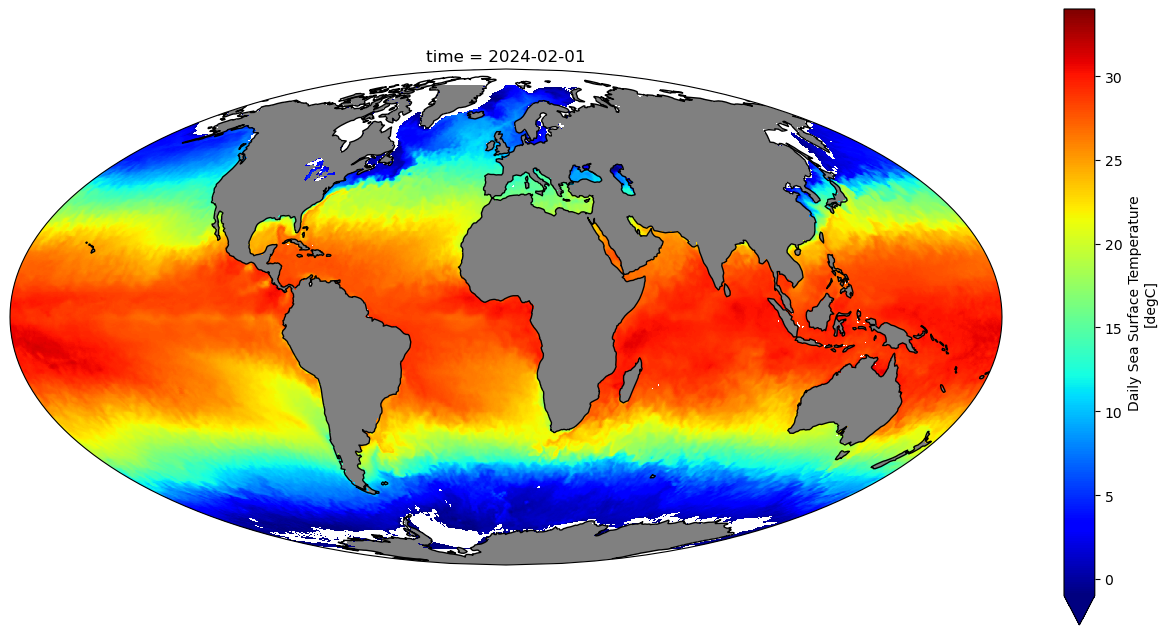

In [27]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

projection = ccrs.Mollweide()
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

xrds = xrds.sel(time = desired_date)
sst = xrds['sst'].where(xrds['sst'] > -3)

vmin = -1
vmax = 34

sst.plot(ax=ax, transform=transform, vmin=vmin, vmax=vmax, cmap='jet')

# Load and plot the sea ice
url = f'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/icec.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

xrds = xrds.sel(time = desired_date)
ice_mask = xrds['icec'].where(xrds['icec'] > 0)

ice_mask.plot(ax=ax, transform=transform, vmin=1, vmax=2, cmap='Greys', add_colorbar=False)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')

plt.savefig(f'sea_water_temperatures.png', transparent=True)
plt.show()

### Zooming in on area of interest

Let's now provide a latitude and longitude range to zoom in on.

If you have an xarray object, for example:

In [28]:
desired_date = '2024-08-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)

Let's first take a subset of that for our desired range

In [29]:
lat_range = slice(36, 74)
lon_range = slice(0, 45)
ds_aoi = ds_one_day.sel(lat=lat_range, lon=lon_range)
ds_aoi

<xarray.Dataset> Size: 111kB
Dimensions:  (lat: 152, lon: 180)
Coordinates:
    time     datetime64[ns] 8B 2024-08-01
  * lat      (lat) float32 608B 36.12 36.38 36.62 36.88 ... 73.38 73.62 73.88
  * lon      (lon) float32 720B 0.125 0.375 0.625 0.875 ... 44.38 44.62 44.88
Data variables:
    sst      (lat, lon) float32 109kB ...
Attributes:
    Conventions:                     CF-1.5
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

This can be more complicated if you need to handled wrapped longitude ranges. You can do this instead.

In [30]:
data_aoi = ds_one_day.sel(
    lat=slice(36, 74), lon=((ds_one_day.lon >= 335) | (ds_one_day.lon <= 45))
)
data_aoi['lon'].values

array([1.25000e-01, 3.75000e-01, 6.25000e-01, 8.75000e-01, 1.12500e+00,
       1.37500e+00, 1.62500e+00, 1.87500e+00, 2.12500e+00, 2.37500e+00,
       2.62500e+00, 2.87500e+00, 3.12500e+00, 3.37500e+00, 3.62500e+00,
       3.87500e+00, 4.12500e+00, 4.37500e+00, 4.62500e+00, 4.87500e+00,
       5.12500e+00, 5.37500e+00, 5.62500e+00, 5.87500e+00, 6.12500e+00,
       6.37500e+00, 6.62500e+00, 6.87500e+00, 7.12500e+00, 7.37500e+00,
       7.62500e+00, 7.87500e+00, 8.12500e+00, 8.37500e+00, 8.62500e+00,
       8.87500e+00, 9.12500e+00, 9.37500e+00, 9.62500e+00, 9.87500e+00,
       1.01250e+01, 1.03750e+01, 1.06250e+01, 1.08750e+01, 1.11250e+01,
       1.13750e+01, 1.16250e+01, 1.18750e+01, 1.21250e+01, 1.23750e+01,
       1.26250e+01, 1.28750e+01, 1.31250e+01, 1.33750e+01, 1.36250e+01,
       1.38750e+01, 1.41250e+01, 1.43750e+01, 1.46250e+01, 1.48750e+01,
       1.51250e+01, 1.53750e+01, 1.56250e+01, 1.58750e+01, 1.61250e+01,
       1.63750e+01, 1.66250e+01, 1.68750e+01, 1.71250e+01, 1.737

We can then proceed to plotting the data as normal.

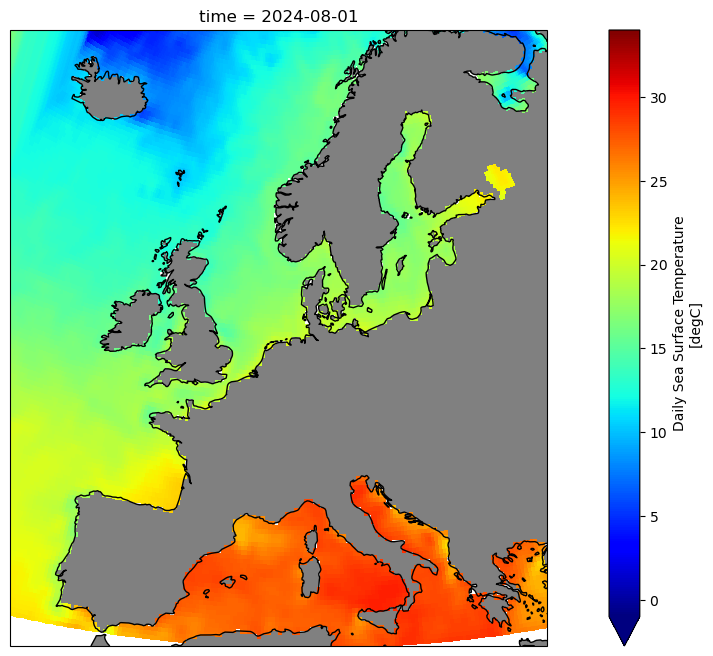

In [31]:
fig = plt.figure(figsize=(16, 8))
projection = ccrs.EuroPP()
transform = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

vmin = -1
vmax = 34
cmap='jet'

data_aoi['sst'].plot(
    ax=ax,
    transform=transform,
    vmin=vmin,
    vmax=vmax, 
    cmap=cmap
)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')
plt.show()

### Finding the sea surface temperature at a given location and date

Let's now look at how to find the value for the sea surface temperature at a given location and time. We will using the method `nearest` to find the nearest value to our selected point, though other methods are available.

https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html


In [32]:
desired_date = '2024-02-01'
desired_latitude = 73.5624
desired_longitude = 30.0142

year = desired_date.split('-')[0]

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

sst_value = xrds.sel(
    time = desired_date,
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)['sst'].values

print(sst_value)


3.87


We might also want to find out what latitude, longitude and time that value corresponds to.

In [33]:
desired_date = '2024-02-01'
desired_latitude = 73.5624
desired_longitude = 30.0142

year = desired_date.split('-')[0]

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

single_point = xrds.sel(
    time = desired_date,
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)

latitude_value = single_point['lat'].values
longitude_value = single_point['lon'].values
time_value = single_point['time'].values
sst_value = single_point['sst'].values

print('Latitude:',latitude_value)
print('Longitude:',longitude_value)
print('Time:',time_value)
print('Sea surface temperature value:',sst_value)

Latitude: 73.625
Longitude: 30.125
Time: 2024-02-01T00:00:00.000000000
Sea surface temperature value: 3.87


### Interactive plot

We can create an interactive plot that we zoom in on, rotate, and observe exact values for the `sst` at any coordinate. We will use `plotly` to do this.

Interactive plots can require a lot of memory, so let's downsample the data first to make it easier to work with for this example.

In [34]:
# Define parameters
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

# Load the dataset from the remote server and select the desired date
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)
xrds = xrds.sel(time=desired_date)

# Downsample the dataset by selecting every 4th point along lat and lon
xrds_ds = xrds.isel(lat=slice(None, None, 4), lon=slice(None, None, 4))

# Apply a filter to the sea surface temperature data
sst = xrds_ds['sst'].where(xrds_ds['sst'] > -3)

Now let's extract our latitude, longitude and sea surface temperature values.

We first need to create 2D grids for our 1D latitude and longitude arrays, to match the sea surface temperature values.

In [37]:
sst_array = sst.values  # shape: (n_lat, n_lon)
lon_values = sst['lon'].values  # 1D array of longitudes
lat_values = sst['lat'].values  # 1D array of latitudes

lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)

Next, we will flatten all the 2D arrays so we have 1D arrays of equal length. 

In [38]:
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()
sst_flat = sst_array.flatten()

Finally, let's plot the data. We will create a `ScatterGeo` plot that allows us to use a projection. We can select projections from:

https://plotly.com/python/map-configuration/

In [39]:
# Create a scattergeo plot
fig = go.Figure(data=go.Scattergeo(
    lon = lon_flat,
    lat = lat_flat,
    mode = 'markers',
    marker = dict(
        color = sst_flat,
        colorscale = 'Jet',
        cmin = np.nanmin(sst_flat),
        cmax = np.nanmax(sst_flat),
        colorbar = dict(title="Temperature (°C)"),
        size = 6,  # Adjust size for best visual appearance
        opacity = 0.7
    ),
    hovertemplate = 'Lat: %{lat}<br>Lon: %{lon}<br>SST: %{marker.color:.2f}°C<extra></extra>'  # Display lat, lon, SST on hover
))

# Update layout with an orthographic projection and some geographical features
fig.update_layout(
    title = "Sea Surface Temperature (°C)",
    geo = dict(
        projection = dict(type = "orthographic"),
        showcoastlines = True,
        coastlinecolor = "black",
        showland = True,
        landcolor = "rgb(229, 229, 229)",
        showcountries = True,
        countrycolor = "black",
    )
)

# For display in a Jupyter Book (uncomment fig.show() if using a notebook)
# fig.show()
fig.write_html("interactive_plot_sst.html")

In [40]:
from IPython.display import IFrame

# Embed the saved interactive_plot.html file in the next cell
IFrame('interactive_plot_sst.html', width=900, height=600)